## Classification with Fashion-MNIST in tf.keras

#### Fasion-MNIST
10개의 label로 이루어진 의류 이미지 데이터

### Import the fashion_mnist dataset

In [1]:
#!pip install -q -U tensorflow-gpu=1.12.0

import tensorflow as tf

import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# x : image, y : label 
# train : 60000, test : 10000
print("x_train shape : ", x_train.shape, "y_train shape : ", y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape :  (60000, 28, 28) y_train shape :  (60000,)



</br>

### Data Visualize

y= 5 | Sandal


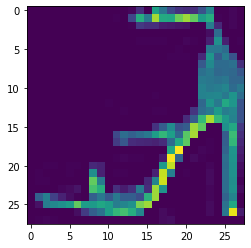

In [3]:
# label definition
fashion_mnist_labels = ['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle_boot']


# one random image from x_train
img_index = random.randint(1,x_train.shape[0])

# label idx
label_index = y_train[img_index]

# showing
print("y=", str(label_index), "|", fashion_mnist_labels[label_index])
plt.imshow(x_train[img_index])



</br>

### Data Normalization


In [4]:
# fitting data in similar scale
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
print("Number of train data : ", len(x_train))
print("Number of test data : ", len(x_test))

Number of train data :  60000
Number of test data :  10000




</br>

### Split data into Train/Validation/Test data sets
train data : data for training model </br>

validation data : data for hyperparameter tuning and validation </br>

test data : after all validation and training, at the last test 

In [6]:
# split train | validation
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Image reshape (28,28) --> (28,28,1)
w, h = 28, 28 # width, height

x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# one-hot encoding in label
# only one dimension get value 1 and other dimension value 0 
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("x_train shape: ", x_train.shape )
print("y_train shape: ", y_train.shape )

print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape:  (55000, 28, 28, 1)
y_train shape:  (55000, 10)
55000 train set
5000 validation set
10000 test set



</br>


### Modeling 
Conv2D() </br>
Pooling() </br>
Dropout() </br>

In [7]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________


</br>

### Model Compile
학습 프로세스 구성</br>
optimizer, loss function, metrics 

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy']) # 평가 기준 



</br>

### Model Training
ModelCheckpoint API로 epoch마다 모델 저장 

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint


checkpointer = ModelCheckpoint(filepath = 'model.weights.best.hdf5', verbose = 1, save_best_only=True) # verbose 1 : seeing progress 

model.fit(x_train,
          y_train,
          batch_size=64,
          epochs=10,
          validation_data=(x_valid,y_valid),
          callbacks = [checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54912/55000 [============================>.] - ETA: 0s - loss: 0.6213 - acc: 0.7712
Epoch 00001: val_loss improved from inf to 0.38359, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 35s 637us/step - loss: 0.6210 - acc: 0.7714 - val_loss: 0.3836 - val_acc: 0.8646
Epoch 2/10
54912/55000 [============================>.] - ETA: 0s - loss: 0.4201 - acc: 0.8466
Epoch 00002: val_loss improved from 0.38359 to 0.32603, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 34s 616us/step - loss: 0.4203 - acc: 0.8466 - val_loss: 0.3260 - val_acc: 0.8822
Epoch 3/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.3801 - acc: 0.8606
Epoch 00003: val_loss improved from 0.32603 to 0.29405, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 35s 643us/step - loss: 0.3801 - acc: 0.8606 - val_loss: 0.2941 - val_acc: 0.893

### Model Test

In [10]:
# get the best valid weight
model.load_weights('model.weights.best.hdf5') 


# Test Accuracy
score = model.evaluate(x_test, y_test, verbose=0)

print("Test Accuracy: ", score[1])  # [0] : test loss, [1] : accuracy

Test Accuracy:  0.9085




</br>

### Visualize Prediction

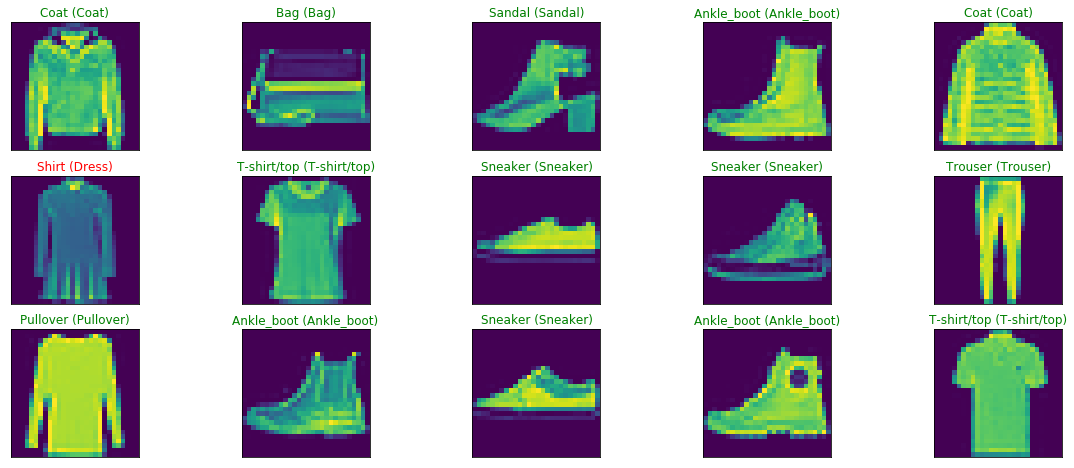

In [11]:
y_hat = model.predict(x_test)

figure = plt.figure(figsize=(20,8))

for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    axis = figure.add_subplot(3,5, i+1, xticks=[], yticks=[])
    axis.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    
    axis.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                   fashion_mnist_labels[true_index]),
                                   color = ("green" if predict_index == true_index else "red"))